<a href="https://colab.research.google.com/github/rajendranast012-stack/in-silico-lab1/blob/main/morgan_fingerprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 60.0 MB/s eta 0:00:00


In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import warnings

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem, PandasTools, MACCSkeys, AtomPairs, rdFingerprintGenerator
from rdkit import DataStructs
from rdkit.Chem.rdmolops import PatternFingerprint
from rdkit.Avalon import pyAvalonTools
from rdkit.Chem.AtomPairs.Pairs import GetAtomPairFingerprintAsBitVect
pd.set_option('display.max_rows', None)

warnings.filterwarnings("ignore")

In [3]:
df = pd.read_excel('/content/name.xlsx')

In [ ]:
df

generating molecualr structure from SMILES.

In [6]:
# Creating molecular object from Smiles

PandasTools.AddMoleculeColumnToFrame(df,'SMILES','mol')

,Name,SMILES,mol
0,"2-(3,4-dihydroxyphenyl)-3,5,7-trihydroxychrome...",C1=CC(=C(C=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O)O,
1,"5,7-dihydroxy-8-methoxy-2-phenylchromen-4-one",COC1=C(C=C(C2=C1OC(=CC2=O)C3=CC=CC=C3)O)O,
2,"3,5-dihydroxy-2-(4-hydroxyphenyl)-7-methoxychr...",COC1=CC(=C2C(=C1)OC(=C(C2=O)O)C3=CC=C(C=C3)O)O,
3,"3,5-dihydroxy-2-(4-hydroxy-3-methoxyphenyl)-7-...",COC1=CC(=C2C(=C1)OC(=C(C2=O)O)C3=CC(=C(C=C3)O)...,
4,"3,5,7-trihydroxy-2-(4-hydroxy-3-methoxyphenyl)...",COC1=C(C=CC(=C1)C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O,
5,"2,3-dimethoxy-6-[(3R)-7-methoxy-3,4-dihydro-2H...",COC1=CC2=C(CC(CO2)C3=C(C(=C(C=C3)OC)OC)O)C=C1,
6,7-hydroxy-3-(4-hydroxyphenyl)chromen-4-one,C1=CC(=CC=C1C2=COC3=C(C2=O)C=CC(=C3)O)O,
7,"3-(4-methoxyphenyl)-7-[(2S,3R,4S,5S,6R)-3,4,5-...",COC1=CC=C(C=C1)C2=COC3=C(C2=O)C=CC(=C3)OC4C(C(...,
8,7-hydroxy-3-(4-methoxyphenyl)chromen-4-one,COC1=CC=C(C=C1)C2=COC3=C(C2=O)C=CC(=C3)O,
9,"(3S)-3-(3-hydroxy-2,4-dimethoxyphenyl)-3,4-dih...",COC1=C(C(=C(C=C1)C2CC3=C(C=C(C=C3)O)OC2)OC)O,

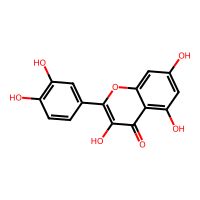
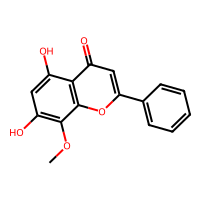
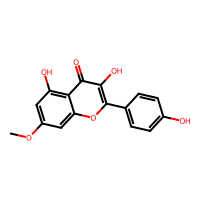
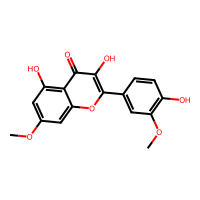
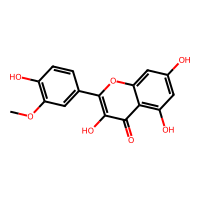
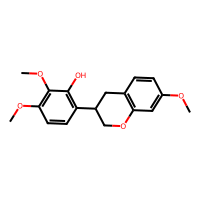
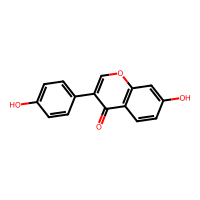
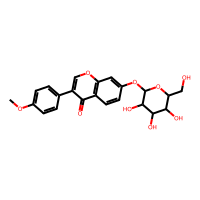
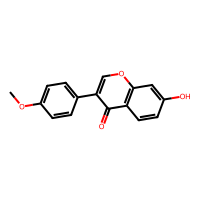
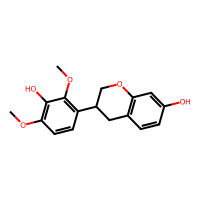
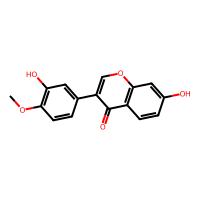
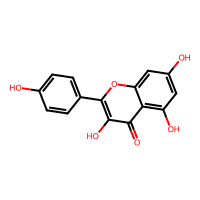
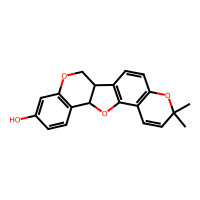
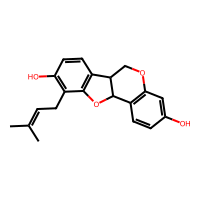
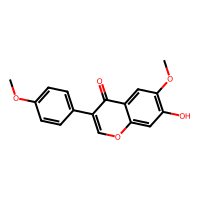
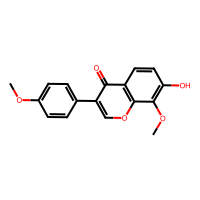
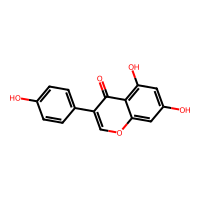
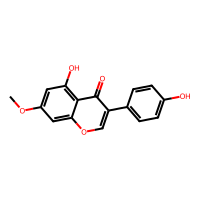
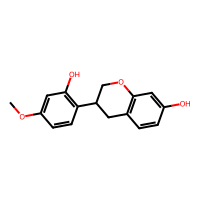
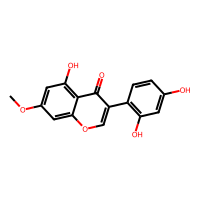
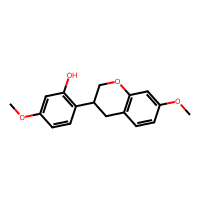
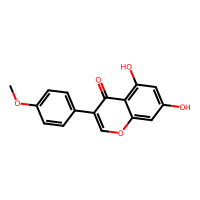
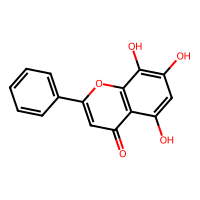
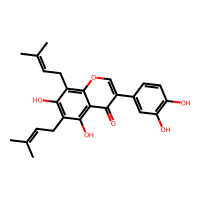
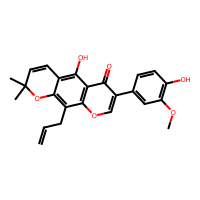
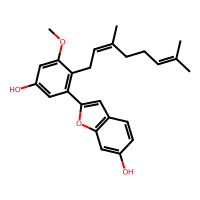
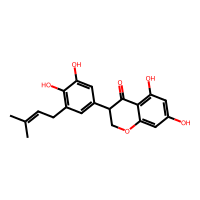
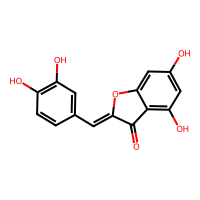
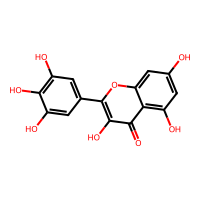
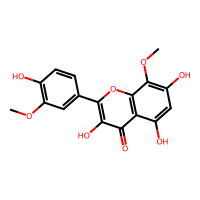
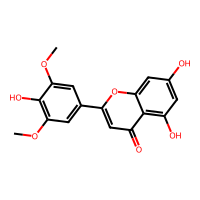
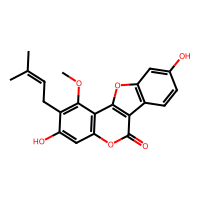
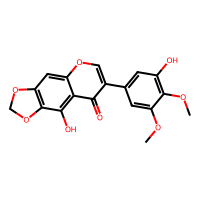
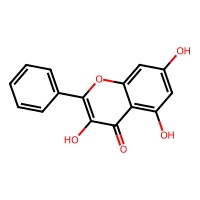
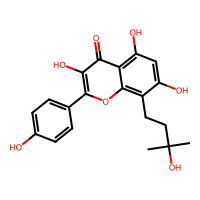
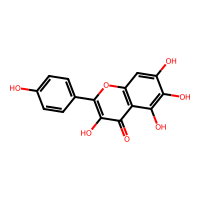
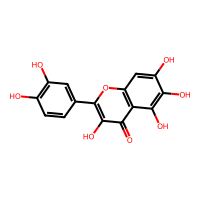
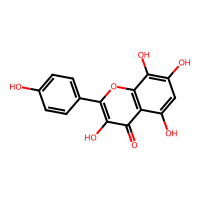
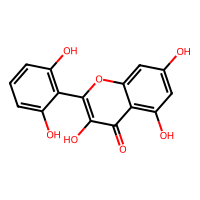
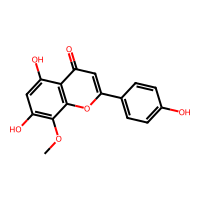
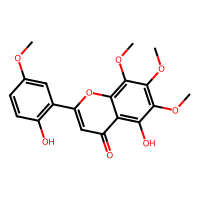
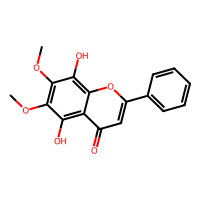
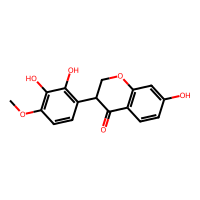
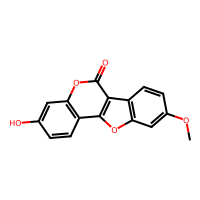
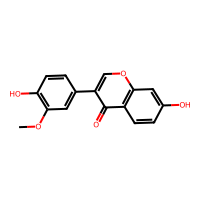
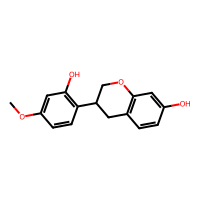
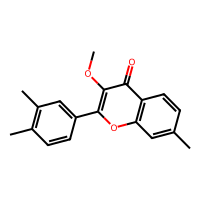
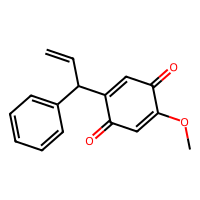
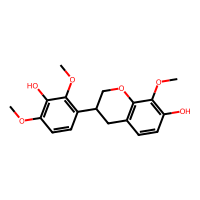
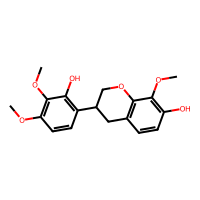
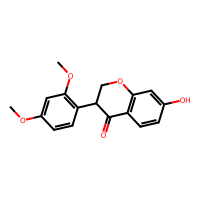
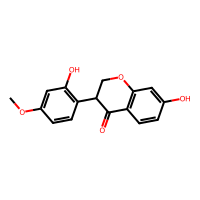
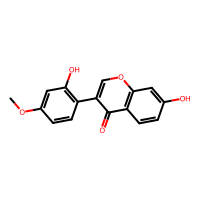
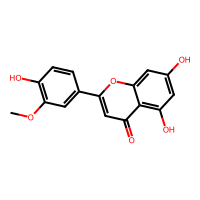
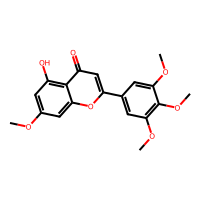
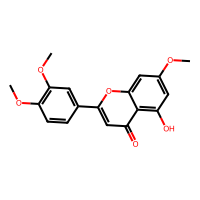
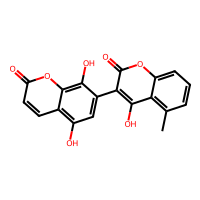
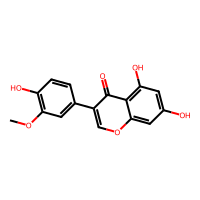
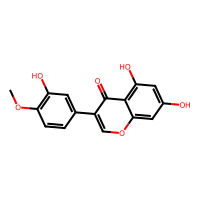
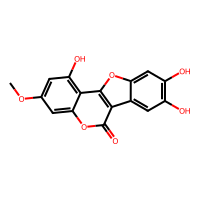
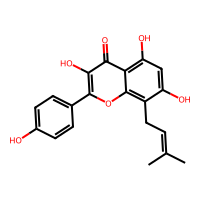
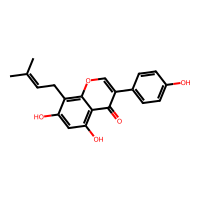
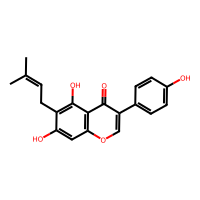
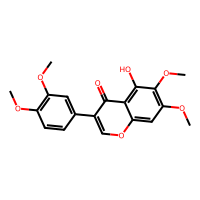
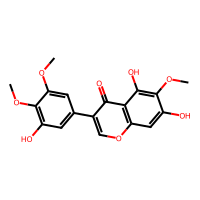
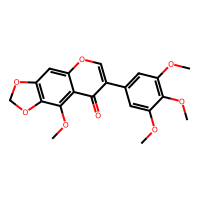
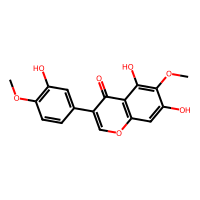
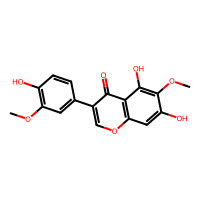
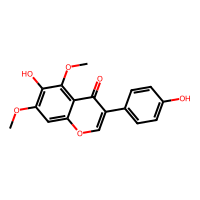
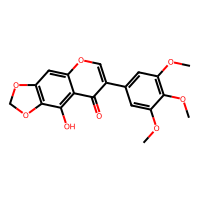
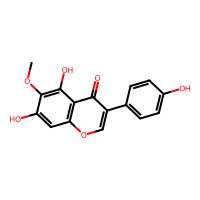
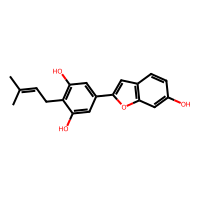
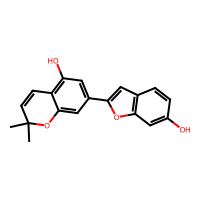
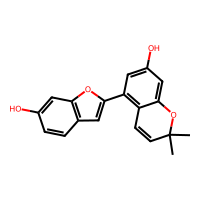
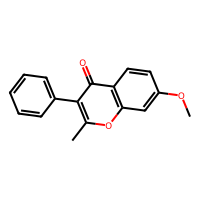
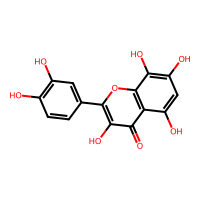
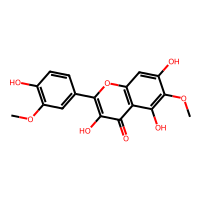
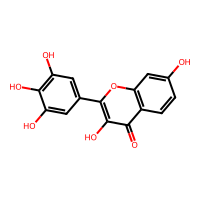
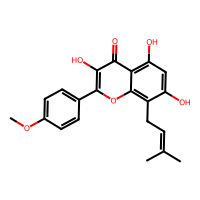
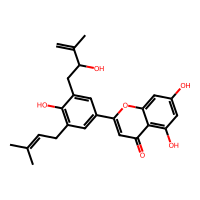
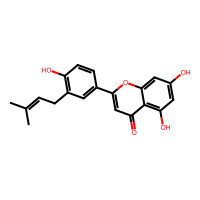
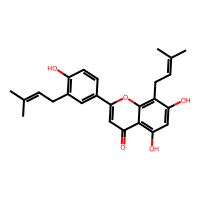
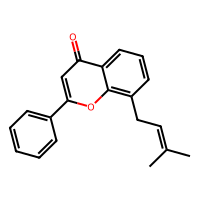
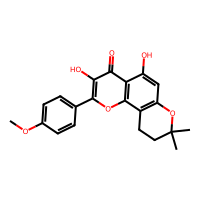
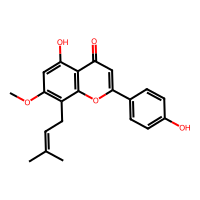
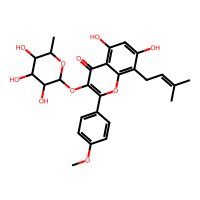
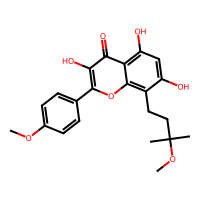
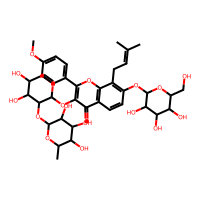
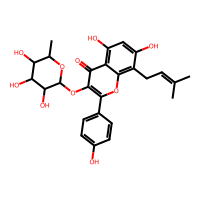
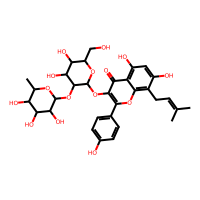
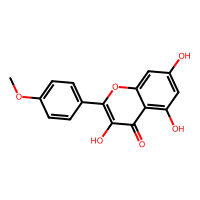
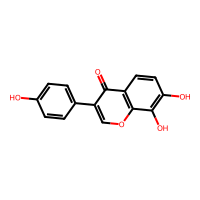
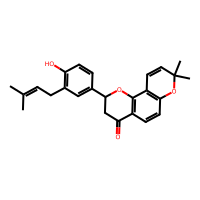
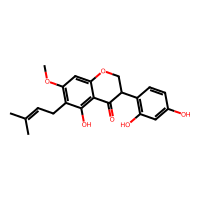
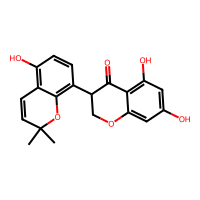
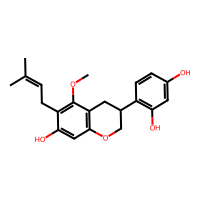
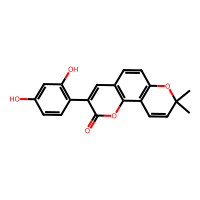
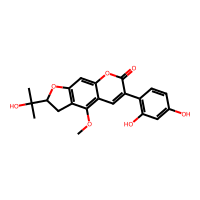
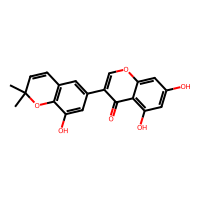
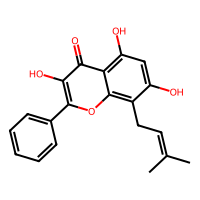
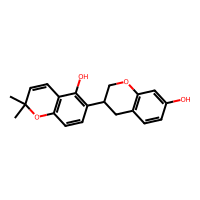
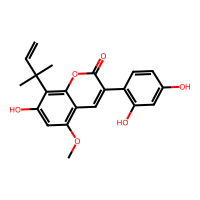
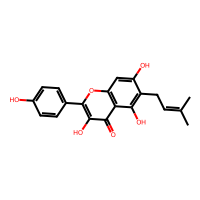
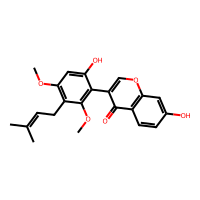
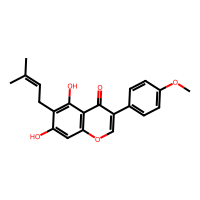
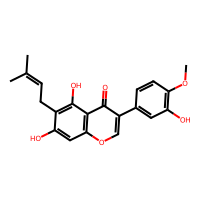
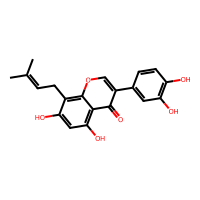
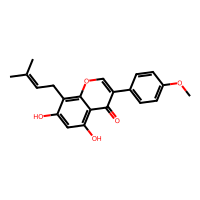
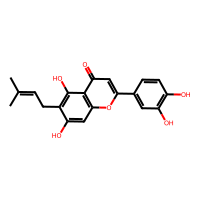
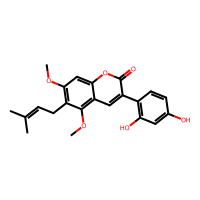
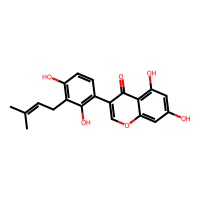
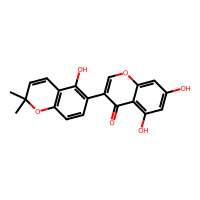
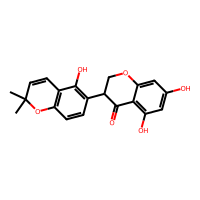
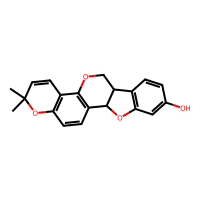
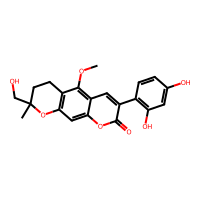
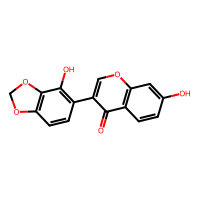
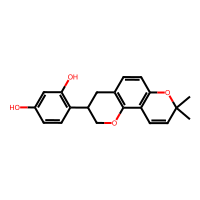
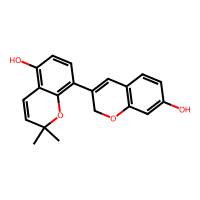
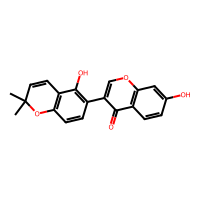
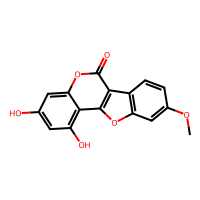
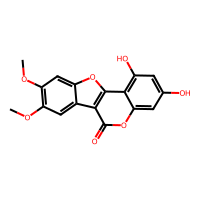
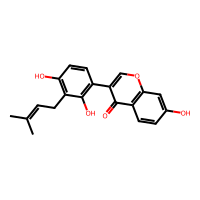
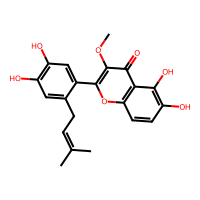
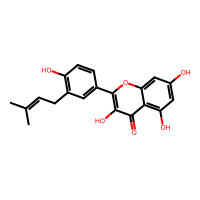
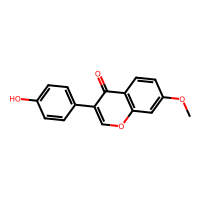
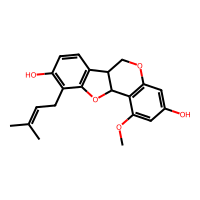
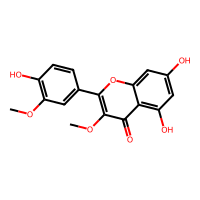
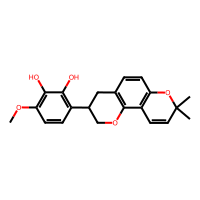
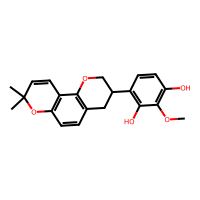
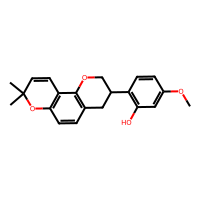
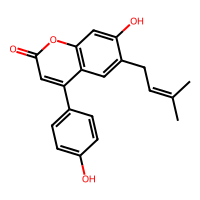
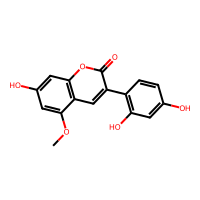
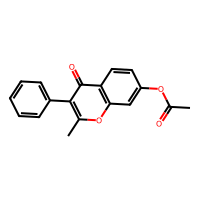
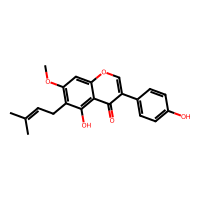
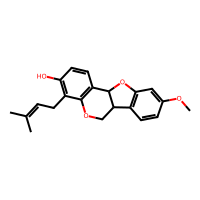
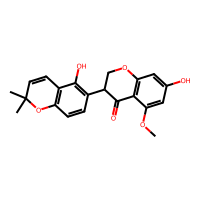
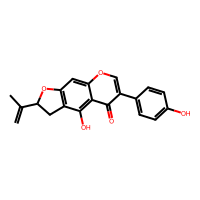
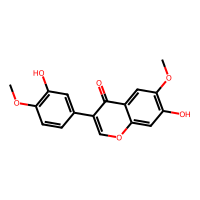
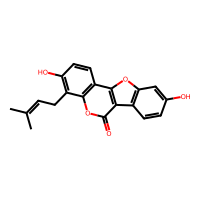
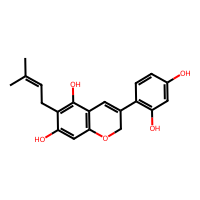
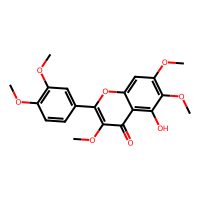
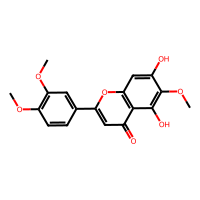
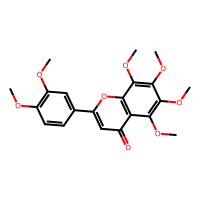
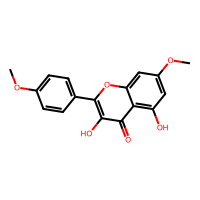
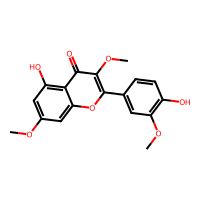
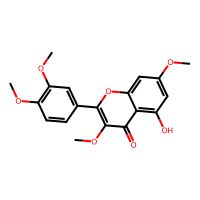
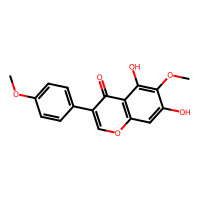
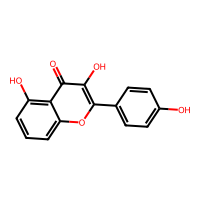
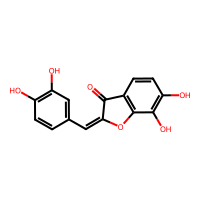
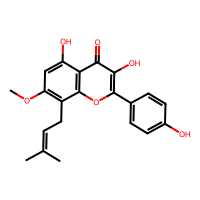
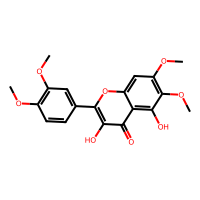
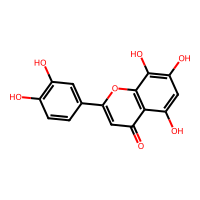
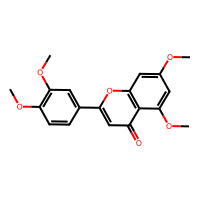
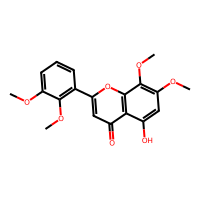
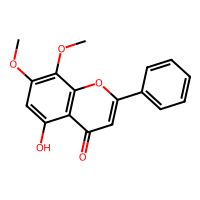
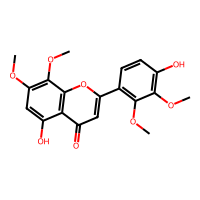
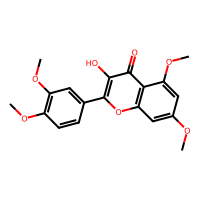
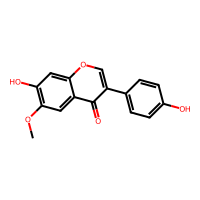
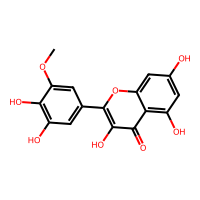
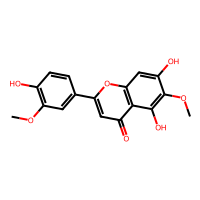
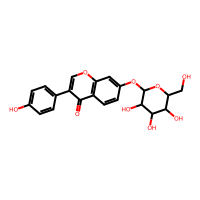
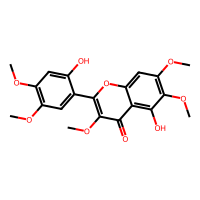
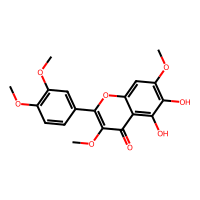
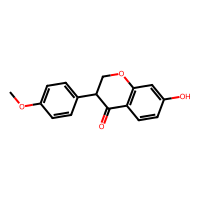
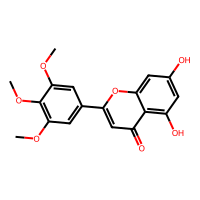
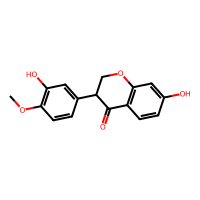
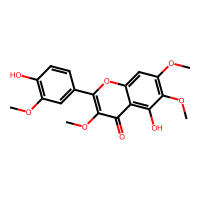
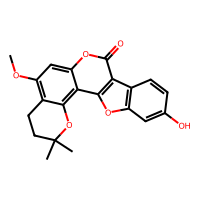
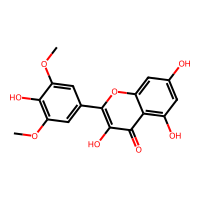
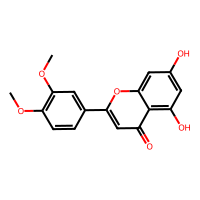
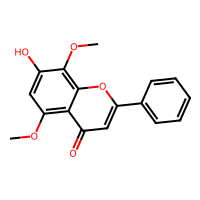
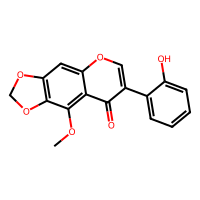
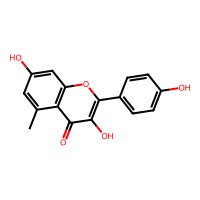
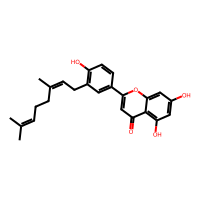
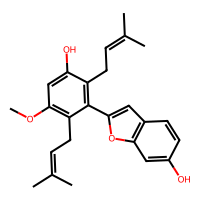
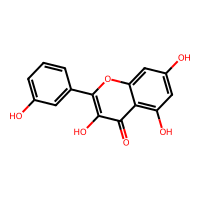
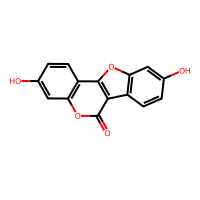
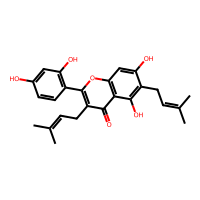
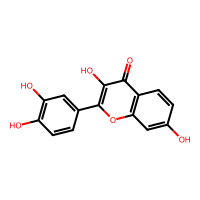
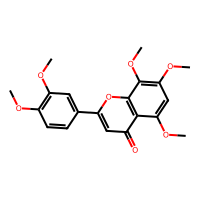
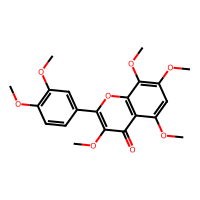
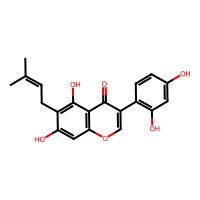
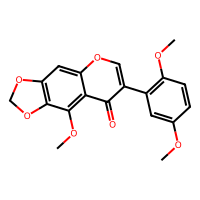
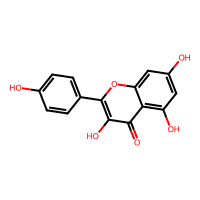
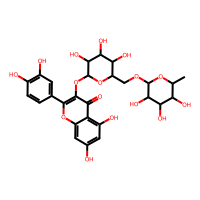
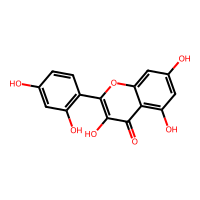
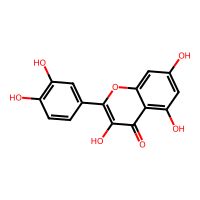

In [7]:
df

MORGAN FIGERPINT

In [8]:

df_mf = []
for mol in df['mol']:
  mf_bitvector = AllChem.GetMorganFingerprintAsBitVect(mol, radius=1, nBits = 2048)
  arr = np.zeros((0,), dtype=np.int8)
  # convert the RDKit explicit vectors into numpy arrays
  DataStructs.ConvertToNumpyArray(mf_bitvector,arr)
  df_mf.append(arr)

MF = pd.concat([df, pd.DataFrame(df_mf)], axis=1)

[14:50:16] DEPRECATION WARNING: please use MorganGenerator
[14:50:16] DEPRECATION WARNING: please use MorganGenerator
[14:50:16] DEPRECATION WARNING: please use MorganGenerator
[14:50:16] DEPRECATION WARNING: please use MorganGenerator
[14:50:16] DEPRECATION WARNING: please use MorganGenerator
[14:50:16] DEPRECATION WARNING: please use MorganGenerator
[14:50:16] DEPRECATION WARNING: please use MorganGenerator
[14:50:16] DEPRECATION WARNING: please use MorganGenerator
[14:50:16] DEPRECATION WARNING: please use MorganGenerator
[14:50:16] DEPRECATION WARNING: please use MorganGenerator
[14:50:16] DEPRECATION WARNING: please use MorganGenerator
[14:50:16] DEPRECATION WARNING: please use MorganGenerator
[14:50:16] DEPRECATION WARNING: please use MorganGenerator
[14:50:16] DEPRECATION WARNING: please use MorganGenerator
[14:50:16] DEPRECATION WARNING: please use MorganGenerator
[14:50:16] DEPRECATION WARNING: please use MorganGenerator
[14:50:16] DEPRECATION WARNING: please use MorganGenerat

In [9]:

MF.head()

,Name,SMILES,mol,0,1,2,3,4,5,6,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,"2-(3,4-dihydroxyphenyl)-3,5,7-trihydroxychrome...",C1=CC(=C(C=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O)O,<rdkit.Chem.rdchem.Mol object at 0x7d854867b840>,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"5,7-dihydroxy-8-methoxy-2-phenylchromen-4-one",COC1=C(C=C(C2=C1OC(=CC2=O)C3=CC=CC=C3)O)O,<rdkit.Chem.rdchem.Mol object at 0x7d854867ba00>,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"3,5-dihydroxy-2-(4-hydroxyphenyl)-7-methoxychr...",COC1=CC(=C2C(=C1)OC(=C(C2=O)O)C3=CC=C(C=C3)O)O,<rdkit.Chem.rdchem.Mol object at 0x7d854867ba70>,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"3,5-dihydroxy-2-(4-hydroxy-3-methoxyphenyl)-7-...",COC1=CC(=C2C(=C1)OC(=C(C2=O)O)C3=CC(=C(C=C3)O)...,<rdkit.Chem.rdchem.Mol object at 0x7d854867bae0>,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"3,5,7-trihydroxy-2-(4-hydroxy-3-methoxyphenyl)...",COC1=C(C=CC(=C1)C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O,<rdkit.Chem.rdchem.Mol object at 0x7d854867bb50>,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
type(MF.iloc[0,1])


str

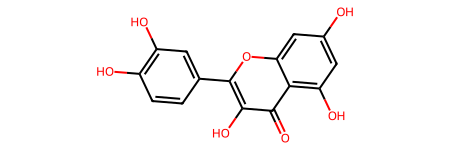

In [15]:
from rdkit import Chem
from rdkit.Chem import Draw

smiles = MF.iloc[0,1]
mol = Chem.MolFromSmiles(smiles)

display(mol)


'C1=CC(=C(C=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O)O'

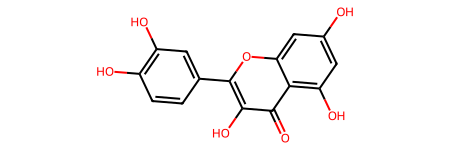

No of ones in the N-Methyl pyrrole MF are:  18
No of zeros in the N-Methyl pyrrole MF are:  2030 

202     1
314     1
525     1
650     1
656     1
745     1
807     1
875     1
1160    1
1380    1
1602    1
1604    1
1607    1
1750    1
1808    1
1873    1
1984    1
2028    1
Name: 0, dtype: object


'COC1=C(C=C(C2=C1OC(=CC2=O)C3=CC=CC=C3)O)O'

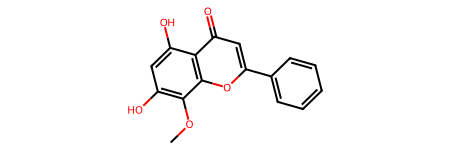

No of ones in the pyrrole MF are:  22
No of zeros in the pyrrole MF are:  2026 

121     1
133     1
314     1
333     1
650     1
656     1
695     1
807     1
841     1
875     1
1057    1
1088    1
1160    1
1380    1
1536    1
1602    1
1604    1
1607    1
1750    1
1873    1
1944    1
1984    1
Name: 1, dtype: object


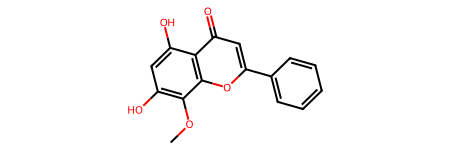

In [21]:
from rdkit import Chem
from rdkit.Chem import Draw

# print first molecule in the dataset
display(MF.iloc[0,1])
nmpyrrole = MF.iloc[0,2:]

# get structure of the loci molleulce
smiles = MF.iloc[0,1]
mol = Chem.MolFromSmiles(smiles)

display (mol)
# get the number of ones and zeros in the first molecule
print(f'No of ones in the N-Methyl pyrrole MF are:  {nmpyrrole[nmpyrrole==1].count()}')
print(f'No of zeros in the N-Methyl pyrrole MF are:  {nmpyrrole[nmpyrrole==0].count()} \n')

# grab the column names where bits are 1s
print(nmpyrrole[nmpyrrole==1])

# print second molecule in the dataset
display(MF.iloc[1,1])
pyrrole = MF.iloc[1,2:]

# get structure of the loci molleulce
smiles = MF.iloc[1,1]
mol = Chem.MolFromSmiles(smiles)

display(mol)

# get the number of ones and zeros in the second molecule
print(f'No of ones in the pyrrole MF are:  {nmpyrrole[pyrrole==1].count()}')
print(f'No of zeros in the pyrrole MF are:  {nmpyrrole[pyrrole==0].count()} \n')

# get the column names where bits are 1s
print(pyrrole[pyrrole==1])


extended connectivity
 circular fingerprinting

In [11]:

df_ecfp = []
for mol in df['mol']:
  ecfp_bitvector = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits = 2048)
  arr = np.zeros((0,), dtype=np.int8)
  # convert the RDKit explicit vectors into numpy arrays
  DataStructs.ConvertToNumpyArray(ecfp_bitvector,arr)
  df_ecfp.append(arr)

ECFP = pd.concat([df, pd.DataFrame(df_ecfp)], axis=1)

[14:56:47] DEPRECATION WARNING: please use MorganGenerator
[14:56:47] DEPRECATION WARNING: please use MorganGenerator
[14:56:47] DEPRECATION WARNING: please use MorganGenerator
[14:56:47] DEPRECATION WARNING: please use MorganGenerator
[14:56:47] DEPRECATION WARNING: please use MorganGenerator
[14:56:47] DEPRECATION WARNING: please use MorganGenerator
[14:56:47] DEPRECATION WARNING: please use MorganGenerator
[14:56:47] DEPRECATION WARNING: please use MorganGenerator
[14:56:47] DEPRECATION WARNING: please use MorganGenerator
[14:56:47] DEPRECATION WARNING: please use MorganGenerator
[14:56:47] DEPRECATION WARNING: please use MorganGenerator
[14:56:47] DEPRECATION WARNING: please use MorganGenerator
[14:56:47] DEPRECATION WARNING: please use MorganGenerator
[14:56:47] DEPRECATION WARNING: please use MorganGenerator
[14:56:47] DEPRECATION WARNING: please use MorganGenerator
[14:56:47] DEPRECATION WARNING: please use MorganGenerator
[14:56:47] DEPRECATION WARNING: please use MorganGenerat

In [12]:
ECFP.head()

,Name,SMILES,mol,0,1,2,3,4,5,6,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,"2-(3,4-dihydroxyphenyl)-3,5,7-trihydroxychrome...",C1=CC(=C(C=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O)O,<rdkit.Chem.rdchem.Mol object at 0x7d854867b840>,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"5,7-dihydroxy-8-methoxy-2-phenylchromen-4-one",COC1=C(C=C(C2=C1OC(=CC2=O)C3=CC=CC=C3)O)O,<rdkit.Chem.rdchem.Mol object at 0x7d854867ba00>,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,"3,5-dihydroxy-2-(4-hydroxyphenyl)-7-methoxychr...",COC1=CC(=C2C(=C1)OC(=C(C2=O)O)C3=CC=C(C=C3)O)O,<rdkit.Chem.rdchem.Mol object at 0x7d854867ba70>,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"3,5-dihydroxy-2-(4-hydroxy-3-methoxyphenyl)-7-...",COC1=CC(=C2C(=C1)OC(=C(C2=O)O)C3=CC(=C(C=C3)O)...,<rdkit.Chem.rdchem.Mol object at 0x7d854867bae0>,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"3,5,7-trihydroxy-2-(4-hydroxy-3-methoxyphenyl)...",COC1=C(C=CC(=C1)C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O,<rdkit.Chem.rdchem.Mol object at 0x7d854867bb50>,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:

# print first molecule in the dataset
display(ECFP.iloc[0,1])
nmpyrrole = ECFP.iloc[0,2:]

# get the number of ones and zeros in the first molecule
print(f'No of ones in the N-Methyl pyrrole ECFP are:  {nmpyrrole[nmpyrrole==1].count()}')
print(f'No of zeros in the N-Methyl pyrrole ECFP are:  {nmpyrrole[nmpyrrole==0].count()} \n')

# grab the column names where bits are 1s
print(nmpyrrole[nmpyrrole==1])

# print second molecule in the dataset
display(ECFP.iloc[1,1])
pyrrole = ECFP.iloc[1,2:]

# get the number of ones and zeros in the second molecule
print(f'No of ones in the pyrrole ECFP are:  {nmpyrrole[pyrrole==1].count()}')
print(f'No of zeros in the pyrrole ECFP are:  {nmpyrrole[pyrrole==0].count()} \n')

# get the column names where bits are 1s
print(pyrrole[pyrrole==1])


'C1=CC(=C(C=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O)O'

No of ones in the N-Methyl pyrrole ECFP are:  34
No of zeros in the N-Methyl pyrrole ECFP are:  2014 

36      1
54      1
167     1
202     1
285     1
314     1
315     1
472     1
501     1
525     1
589     1
650     1
656     1
745     1
807     1
875     1
896     1
897     1
964     1
1160    1
1181    1
1195    1
1242    1
1380    1
1475    1
1602    1
1604    1
1607    1
1609    1
1750    1
1808    1
1873    1
1984    1
2028    1
Name: 0, dtype: object


'COC1=C(C=C(C2=C1OC(=CC2=O)C3=CC=CC=C3)O)O'

No of ones in the pyrrole ECFP are:  37
No of zeros in the pyrrole ECFP are:  2011 

54      1
121     1
133     1
280     1
314     1
333     1
389     1
621     1
650     1
656     1
695     1
736     1
807     1
841     1
865     1
875     1
992     1
1057    1
1088    1
1160    1
1199    1
1380    1
1500    1
1536    1
1599    1
1602    1
1604    1
1607    1
1690    1
1715    1
1750    1
1780    1
1803    1
1873    1
1944    1
1984    1
2038    1
Name: 1, dtype: object
